In [27]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
df = pd.read_csv("cartier_catalog.csv")

In [ ]:
df.head()

In [4]:
df.shape

(692, 7)

In [ ]:
df.isnull().sum()

In [7]:
df = df.drop(["ref", "description", "image"], axis=1)

In [ ]:
df.head()

In [ ]:
sns.countplot(x="categorie", data=df)

In [ ]:
sns.lineplot(x="categorie", y="price", data=df)

In [14]:
def label_encoder(column):
    le = LabelEncoder().fit(column)
    print(column.name, le.classes_)
    return le.transform(column)

In [15]:
df["categorie"].value_counts()

rings        259
bracelets    160
necklaces    155
earrings     118
Name: categorie, dtype: int64

In [16]:
cols = ["categorie", "title", "tags"]

In [ ]:
for col in cols:
    df[col] = label_encoder(df[col])

In [19]:
X = df.drop("categorie", axis=1)
y = df["categorie"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4242)

In [24]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [26]:
xgb_model.score(X_test, y_test)

0.8633093525179856

In [28]:
y_pred = xgb_model.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred)

0.8633093525179856

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.81      0.81      0.81        26
           2       0.77      0.83      0.80        29
           3       0.94      0.92      0.93        51

    accuracy                           0.86       139
   macro avg       0.85      0.85      0.85       139
weighted avg       0.87      0.86      0.86       139



In [31]:
cm = confusion_matrix(y_test, y_pred)

Text(0.5, 23.52222222222222, 'Actual')

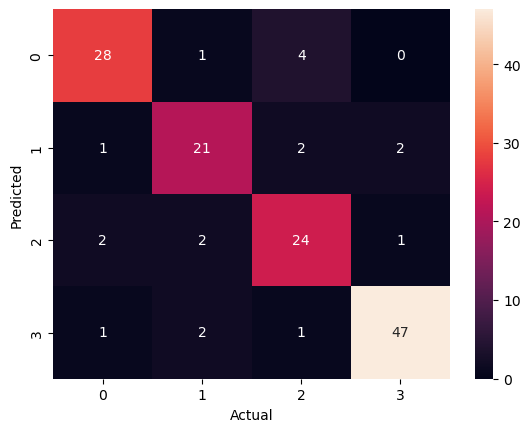

In [34]:
sns.heatmap(cm, annot=True)
plt.ylabel("Predicted")
plt.xlabel("Actual")

In [35]:
pickle.dump(xgb_model, open("xgb.pkl", "wb"))

In [36]:
pickle.dump(sc, open("sc.pkl", "wb"))

In [38]:
pickle.dump(label_encoder, open("le.pkl", "wb"))